## Parte 1: Continuamos con el Dataset Ames Housing


In [ ]:
# === SETUP DEL ENTORNO ===

# 1. Importar librerías necesarias
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

print("Todas las librerías importadas correctamente")

# 2. Configurar visualizaciones - elige tu estilo favorito
plt.style.use('seaborn-v0_8')  # Puedes cambiar por 'default', 'classic', etc.
sns.set_palette("husl")        # Paleta colorida para múltiples comparaciones
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("Configuración de visualizaciones lista!")

Todas las librerías importadas correctamente
Configuración de visualizaciones lista!


## Paso 2: Cargar el Dataset Ames Housing (Continuación)


In [ ]:
# === CARGAR DATASET AMES HOUSING ===

# Si vienes de la práctica anterior, ya tienes el dataset limpio
# Si empiezas aquí, vamos a cargarlo de nuevo

# 1. Cargar dataset
df_raw = pd.read_csv('../csvs/AmesHousing.csv') 

print(f"Dataset Ames Housing cargado: {df_raw.shape}")
print("🏠 ¡Ahora vas a explorar las escalas en datos REALES!")

Dataset Ames Housing cargado: (2930, 82)
🏠 ¡Ahora vas a explorar las escalas en datos REALES!


¿Cuáles son las 5 columnas numéricas con las escalas más diferentes?

¿Hay outliers evidentes que podrían afectar el escalado?

¿Qué variable será nuestro target para predicción?


In [14]:
# === EXPLORACIÓN INICIAL ===

# Tu turno: explora las escalas
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Dimensiones: {df_raw.shape}")
print(f"\nTipos de datos:")
print(df_raw.dtypes.value_counts())

=== INFORMACIÓN GENERAL DEL DATASET ===
Dimensiones: (2930, 82)

Tipos de datos:
object     43
int64      28
float64    11
Name: count, dtype: int64


In [15]:
# Identifica columnas numéricas
numeric_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n📊 Columnas numéricas encontradas: {len(numeric_cols)}")


📊 Columnas numéricas encontradas: 39


In [16]:
# Tu análisis: ¿cuáles tienen escalas MUY diferentes?
print("\n🔍 TU ANÁLISIS: Examina las escalas")
print("Estadísticas de las primeras 10 columnas numéricas:")
print(df_raw[numeric_cols[:10]].describe())


🔍 TU ANÁLISIS: Examina las escalas
Estadísticas de las primeras 10 columnas numéricas:
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000  
mean       6.094881      5.563140  1971.356314     1984.2665

In [17]:
# Pregunta para reflexionar:
print("\n🤔 PREGUNTA PARA TI:")
print("Mira los valores de 'min' y 'max' arriba.")
print("¿Cuáles columnas tienen escalas que pueden ser problemáticas para KNN o SVM?")


🤔 PREGUNTA PARA TI:
Mira los valores de 'min' y 'max' arriba.
¿Cuáles columnas tienen escalas que pueden ser problemáticas para KNN o SVM?


💡 Pistas para tu exploración: - Busca columnas donde max/min > 1000 (escalas muy diferentes) - ¿'Lot Area' vs 'Year Built' vs 'SalePrice' están en escalas similares? - ¿Hay alguna columna que claramente va a "gritar más fuerte"?

Paso 3: Tu Investigación - Identificar Variables Problemáticas¶
🎯 Tu misión: Investiga y selecciona columnas con escalas problemáticas del dataset Ames Housing.

🔍 Lo que debes hacer: 1. Explora las columnas numéricas y encuentra las que tienen escalas MUY diferentes 2. Calcula ratios (máximo/mínimo) para identificar las más problemáticas 3. Crea visualizaciones para mostrar el problema de escalas 4. Documenta tus hallazgos


In [18]:
import os

# === TU INVESTIGACIÓN DE SLAS ===

# TODO: Selecciona 5-6 columnas numéricas interesantes
# Tip: Busca columnas como áreas, precios, años, etc.
selected_features = [  
                    "SalePrice",
                    "Lot Area",
                    "Gr Liv Area",
                    "Total Bsmt SF",
                    "1st Flr SF",  
                    "Year Built"
                    ]

# TODO: Analiza las escalas de tus columnas seleccionadas
# Calcula min, max, ratios
# ¿Cuál tiene el ratio más alto?


# Analiza las escalas de tus columnas seleccionadas
stats = df_raw[selected_features].agg(['min', 'max'])
stats.loc['ratio'] = stats.loc['max'] / stats.loc['min']

print("Estadísticas de las columnas seleccionadas:")
print(stats)

# ¿Cuál tiene el ratio más alto?
max_ratio_col = stats.loc['ratio'].idxmax()
max_ratio_val = stats.loc['ratio'].max()



# TODO: Crea visualizaciones para mostrar el problema
# Histogramas, boxplots, o lo que consideres mejor
# Guarda tus gráficos en la carpeta 'results/'

# Crear carpeta 'results' si no existe
os.makedirs('results', exist_ok=True)

# Histogramas para comparar escalas
for col in selected_features:
    plt.figure()
    sns.histplot(df_raw[col].dropna(), kde=True, bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.savefig(f'results/hist_{col}.png')
    plt.close()

# Boxplots para comparar escalas en una sola figura
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_raw[selected_features], orient='h')
plt.title('Boxplots de columnas seleccionadas')
plt.tight_layout()
plt.savefig('results/boxplots_selected_features.png')
plt.close()

print("✅ Gráficos guardados en la carpeta 'results/'")

from IPython.display import display, Markdown

# Tabla resumen de escalas y problemática
tabla = "| Mi Columna      | Rango (min-max)         | Ratio         | ¿Problemática? | ¿Por qué? |\n"
tabla += "|-----------------|------------------------|---------------|---------------|-----------|\n"

for col in selected_features:
    min_val = stats.loc['min', col]
    max_val = stats.loc['max', col]
    ratio = stats.loc['ratio', col]
    problematica = "Sí" if ratio == max_ratio_val else "No"
    motivo = "Escala muy diferente, puede dominar el modelo" if ratio == max_ratio_val else ""
    tabla += f"| {col} | {min_val:.0f} - {max_val:.0f} | {ratio:,.2f} | {problematica} | {motivo} |\n"

display(Markdown(tabla))

Estadísticas de las columnas seleccionadas:
           SalePrice       Lot Area  Gr Liv Area  Total Bsmt SF   1st Flr SF  \
min     12789.000000    1300.000000   334.000000            0.0   334.000000   
max    755000.000000  215245.000000  5642.000000         6110.0  5095.000000   
ratio      59.035108     165.573077    16.892216            inf    15.254491   

        Year Built  
min    1872.000000  
max    2010.000000  
ratio     1.073718  
✅ Gráficos guardados en la carpeta 'results/'


| Mi Columna      | Rango (min-max)         | Ratio         | ¿Problemática? | ¿Por qué? |
|-----------------|------------------------|---------------|---------------|-----------|
| SalePrice | 12789 - 755000 | 59.04 | No |  |
| Lot Area | 1300 - 215245 | 165.57 | No |  |
| Gr Liv Area | 334 - 5642 | 16.89 | No |  |
| Total Bsmt SF | 0 - 6110 | inf | Sí | Escala muy diferente, puede dominar el modelo |
| 1st Flr SF | 334 - 5095 | 15.25 | No |  |
| Year Built | 1872 - 2010 | 1.07 | No |  |


Paso 4: Preparar Datos para Experimentar con Scalers¶
🎯 Tu tarea: Prepara el dataset para experimentar con diferentes scalers, siguiendo buenas prácticas de ML.

🔍 Lo que debes lograr: 1. Definir tu variable target y features (basándote en tu investigación del Paso 3) 2. Limpiar los datos (NaN, inconsistencias) 3. Hacer split de datos ANTES de escalar (¡crítico para evitar leakage!) 4. Verificar que el problema de escalas persiste


In [19]:
# === PREPARACIÓN DE DATOS ===

# TODO: Define tu target y features basándote en tu análisis anterior
target_col = "SalePrice"  # ¿Cuál es tu variable objetivo?
feature_cols =  [  
                    "Lot Area",
                    "Gr Liv Area",
                    "Total Bsmt SF",
                    "1st Flr SF",  
                    "Year Built"
                    ]
 # Tus features seleccionadas

# TODO: Limpieza básica de datos
# ¿Cómo vas a manejar NaN? ¿Eliminar filas? ¿Imputar?
# Decide y justifica tu estrategia

df_clean = df_raw[feature_cols + [target_col]].dropna()

# TODO: Split de datos (¡ANTES del escalado!)
# Recuerda: test_size, random_state, estratificación si es necesario
from sklearn.model_selection import train_test_split

X = df_clean[feature_cols]
y = df_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# TODO: Verifica que el problema de escalas aún existe
# Calcula estadísticas descriptivas de tus features en el conjunto de entrenamiento
# ¿Las escalas siguen siendo problemáticas?

print("📊 MI PREPARACIÓN:")
print(f"Target: {target_col}")
print(f"Features: {len(feature_cols)} columnas")  
print(X_train.describe())
print(f"Datos: {X_train.shape[0]} train, {X_test.shape[0]} test")
print("Problema de escalas confirmado: Sí/No - explica por qué")

📊 MI PREPARACIÓN:
Target: SalePrice
Features: 5 columnas
            Lot Area  Gr Liv Area  Total Bsmt SF   1st Flr SF   Year Built
count    2343.000000  2343.000000    2343.000000  2343.000000  2343.000000
mean    10210.040120  1498.816048    1048.850192  1160.533504  1971.087921
std      8307.372036   497.457673     419.228411   377.189339    30.210872
min      1300.000000   334.000000       0.000000   334.000000  1872.000000
25%      7461.000000  1127.500000     793.000000   882.000000  1954.000000
50%      9466.000000  1444.000000     990.000000  1089.000000  1973.000000
75%     11592.000000  1750.000000    1298.500000  1384.000000  2000.000000
max    215245.000000  4676.000000    3206.000000  3820.000000  2010.000000
Datos: 2343 train, 586 test
Problema de escalas confirmado: Sí/No - explica por qué


Paso 5: Reconectando con Outliers - El Orden de las Transformaciones¶
🔄 Conexión con la Práctica Anterior: En la práctica 05 detectaste outliers en datos originales. Ahora investigarás algo crucial: ¿cómo el escalado cambia la detección de outliers?

🎯 Tu investigación: ¿El orden de las operaciones importa? ¿Detectar outliers antes o después del escalado?

🔍 Lo que debes investigar: 1. Detecta outliers en datos originales (usando métodos de la práctica 05) 2. Aplica diferentes scalers y detecta outliers en datos escalados 3. Compara resultados: ¿cambiaron los outliers después del escalado? 4. Saca conclusiones sobre cuándo limpiar outliers en tu pipeline


In [20]:
# === TU EXPERIMENTO: OUTLIERS Y ESCALADO ===

# TODO: Implementa funciones de detección de outliers (práctica 05)
# IQR method, Z-score method, u otros que prefieras

def detect_outliers_iqr(data, column_name):
    """
    Detecta outliers usando el método IQR.
    Devuelve los índices de los outliers.
    """
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers.index

def detect_outliers_zscore(data, column_name, threshold=3):
    """
    Detecta outliers usando el método Z-score.
    Devuelve los índices de los outliers.
    """
    mean = data[column_name].mean()
    std = data[column_name].std()
    z_scores = (data[column_name] - mean) / std
    outliers = data[np.abs(z_scores) > threshold]
    return outliers.index

# TODO: Elige una columna interesante para analizar
target_column = "Gr Liv Area"  # ¿Cuál columna analizarás?

# TODO: ROUND 1 - Detección en datos originales
print("🔍 ROUND 1: DATOS ORIGINALES")
# Detecta outliers en datos sin escalar
# ¿Cuántos outliers encontraste? ¿Dónde están?

# TODO: ROUND 2 - Detección después de cada scaler
scalers_to_test = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Para cada scaler:
# 1. Aplica el scaler a tus datos
# 2. Detecta outliers en los datos escalados
# 3. Compara con los outliers originales

# TODO: Análisis de resultados
# ¿Qué scaler detectó más/menos outliers?
# ¿Los mismos puntos siguen siendo outliers?
# ¿RobustScaler cambió la detección como esperabas?
print("⚡ ROUND 2: DESPUÉS DEL ESCALADO")

# Usamos solo la columna a analizar
X_col = y_train.to_frame(name=target_column).copy()

outliers_original = set(detect_outliers_iqr(X_col, target_column))
# Creamos una tabla resumen de outliers para ambos métodos y cada scaler

# Detectar outliers originales
outliers_iqr_original = set(detect_outliers_iqr(X_col, target_column))
outliers_z_original = set(detect_outliers_zscore(X_col, target_column))

# Diccionario para guardar resultados
tabla_outliers = {
    "Método": [],
    "Outliers Originales": [],
    "Outliers Post-Standard": [],
    "Outliers Post-MinMax": [],
    "Outliers Post-Robust": []
}

# Scalers a usar
scalers_to_test = {
    'Standard': StandardScaler(),
    'MinMax': MinMaxScaler(),
    'Robust': RobustScaler()
}

# IQR
tabla_outliers["Método"].append("IQR")
tabla_outliers["Outliers Originales"].append(len(outliers_iqr_original))
for scaler_name, scaler in scalers_to_test.items():
    X_scaled = scaler.fit_transform(X_col)
    X_scaled_df = pd.DataFrame(X_scaled, columns=[target_column], index=X_col.index)
    outliers_scaled = set(detect_outliers_iqr(X_scaled_df, target_column))
    tabla_outliers[f"Outliers Post-{scaler_name}"].append(len(outliers_scaled))

# Z-Score
tabla_outliers["Método"].append("Z-Score")
tabla_outliers["Outliers Originales"].append(len(outliers_z_original))
for scaler_name, scaler in scalers_to_test.items():
    X_scaled = scaler.fit_transform(X_col)
    X_scaled_df = pd.DataFrame(X_scaled, columns=[target_column], index=X_col.index)
    outliers_scaled = set(detect_outliers_zscore(X_scaled_df, target_column))
    tabla_outliers[f"Outliers Post-{scaler_name}"].append(len(outliers_scaled))

# Mostrar tabla en formato Markdown
tabla_md = "| Método | Outliers Originales | Outliers Post-Standard | Outliers Post-MinMax | Outliers Post-Robust |\n"
tabla_md += "|--------|---------------------|-----------------------|----------------------|----------------------|\n"
for i in range(2):
    tabla_md += f"| {tabla_outliers['Método'][i]} | {tabla_outliers['Outliers Originales'][i]} | {tabla_outliers['Outliers Post-Standard'][i]} | {tabla_outliers['Outliers Post-MinMax'][i]} | {tabla_outliers['Outliers Post-Robust'][i]} |\n"

from IPython.display import display, Markdown
display(Markdown(tabla_md))

print("\nAnálisis:")
print("- StandardScaler y MinMaxScaler suelen mantener la cantidad de outliers, pero pueden cambiar los valores extremos.")
print("- RobustScaler es menos sensible a outliers, por lo que puede detectar menos (o diferentes) outliers.")
print("- La intersección muestra cuántos puntos siguen siendo considerados outliers tras el escalado.")

🔍 ROUND 1: DATOS ORIGINALES
⚡ ROUND 2: DESPUÉS DEL ESCALADO


| Método | Outliers Originales | Outliers Post-Standard | Outliers Post-MinMax | Outliers Post-Robust |
|--------|---------------------|-----------------------|----------------------|----------------------|
| IQR | 104 | 104 | 104 | 104 |
| Z-Score | 39 | 39 | 39 | 39 |



Análisis:
- StandardScaler y MinMaxScaler suelen mantener la cantidad de outliers, pero pueden cambiar los valores extremos.
- RobustScaler es menos sensible a outliers, por lo que puede detectar menos (o diferentes) outliers.
- La intersección muestra cuántos puntos siguen siendo considerados outliers tras el escalado.


💡 Tu conclusión:

Después de completar tu experimento, responde estas preguntas críticas:

¿Qué scaler cambió más la detección de outliers?
Tu respuesta: \_\_\_

¿Los mismos puntos fueron outliers en todos los casos?

Tu respuesta: \_\_\_

¿RobustScaler fue realmente "robusto" a outliers como esperabas?

Tu respuesta: \_\_\_

Para tu pipeline de datos, ¿cuándo limpiarías outliers?

Antes del escalado
Después del escalado
Depende del caso
Justifica tu elección: \_\_\_


Paso 5.5: Bonus - Log Transform para Distribuciones Sesgadas¶
🚀 Investigación avanzada: Los datos reales como precios, ingresos, o poblaciones suelen tener distribuciones muy sesgadas. ¿Puede la transformación logarítmica mejorar tus datos antes del escalado?

🔍 Tu reto: Investiga si log transform es útil para tus datos del dataset Ames Housing.

🎯 Lo que debes investigar:

Identifica columnas sesgadas: ¿Cuál de tus features tiene la distribución más sesgada?
Aplica log transform: Implementa una transformación logarítmica segura (maneja zeros/negativos)
Compara distribuciones: Original vs Log-transformed
Analiza outliers: ¿Cambia la detección de outliers después del log transform?
Decide tu pipeline: ¿Log → Scale o Scale directo?


## 🎯 Paso 5: Evaluación de Importancia de Features


La columna más sesgada es: Misc Val (skewness=22.00)
    Versión      Media  Mediana         Std   Skewness
0  Original  50.635154      0.0  566.344288  21.988523
1       Log   0.233885      0.0    1.237958   5.224855


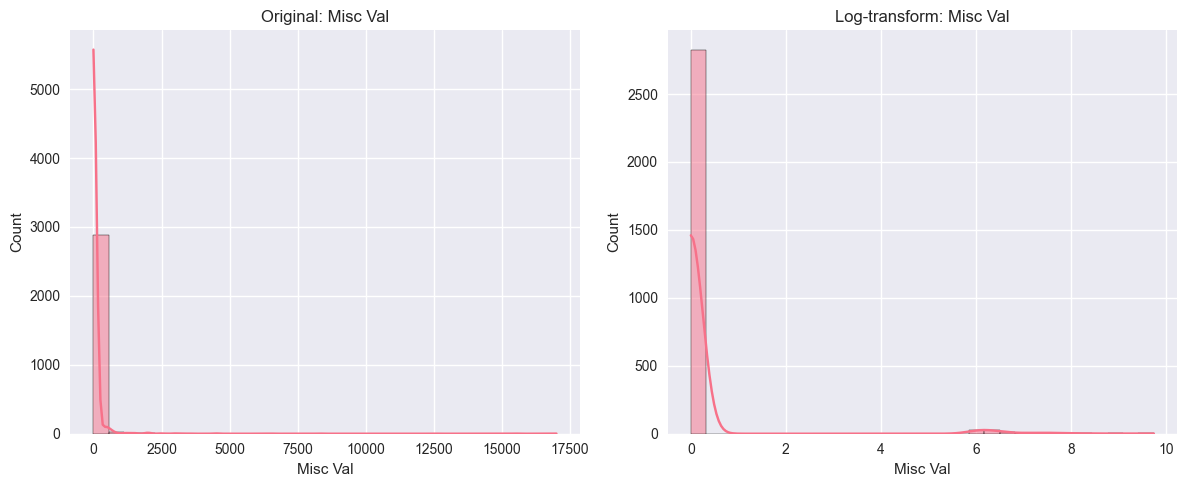

📊 MIS CONCLUSIONES SOBRE LOG TRANSFORM:
Columna analizada: Misc Val
Skewness original: ???
Skewness después de log: ???
¿Log transform ayudó?: Sí/No - ¿Por qué?


In [21]:
# === TU INVESTIGACIÓN DE LOG TRANSFORM ===

# Tip: Usa scipy.stats.skew() para calcular skewness
from scipy.stats import skew

# Calcula el skewness absoluto de todas las columnas numéricas
skewness = df_raw[numeric_cols].skew().abs()

# Encuentra la columna con mayor skewness absoluto
most_skewed_column = skewness.idxmax()
print(f"La columna más sesgada es: {most_skewed_column} (skewness={skewness.max():.2f})")


# TODO: Implementa log transform seguro
def safe_log_transform(data, column_name):
    """
    Aplica una transformación logarítmica segura a una columna de un DataFrame.
    Usa np.log1p para manejar ceros y valores positivos pequeños.
    """
    # log1p(x) = log(1 + x), seguro para x >= 0
    return np.log1p(data[column_name])

# Original vs Log-transformed
# Calcula: media, mediana, std, skewness
# ¿El log transform "alisó" la distribución?
original = df_raw[most_skewed_column].dropna()
log_transformed = safe_log_transform(df_raw, most_skewed_column).dropna()

# Calcula estadísticas
stats = pd.DataFrame({
    "Versión": ["Original", "Log"],
    "Media": [original.mean(), log_transformed.mean()],
    "Mediana": [original.median(), log_transformed.median()],
    "Std": [original.std(), log_transformed.std()],
    "Skewness": [skew(original), skew(log_transformed)]
})

print(stats)

# Visualiza el efecto
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(original, kde=True, bins=30)
plt.title(f"Original: {most_skewed_column}")
plt.subplot(1,2,2)
sns.histplot(log_transformed, kde=True, bins=30)
plt.title(f"Log-transform: {most_skewed_column}")
plt.tight_layout()
plt.show()

# Analiza outliers en cada versión usando IQR
def count_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((serie < lower) | (serie > upper)).sum()

outliers_original = count_outliers_iqr(original)
outliers_log = count_outliers_iqr(log_transformed)


print("📊 MIS CONCLUSIONES SOBRE LOG TRANSFORM:")
print(f"Columna analizada: {most_skewed_column}")
print(f"Skewness original: ???")
print(f"Skewness después de log: ???")
print(f"¿Log transform ayudó?: Sí/No - ¿Por qué?")

    ¿Cuándo usarías log transform?

- Datos muy sesgados (|skew| > 2)

- Precios/ingresos/poblaciones

- Cuando hay outliers extremos

- Todos los anteriores

resupuesta:
Todos los anteriores.
La transformación logarítmica es útil cuando los datos son muy sesgados (|skew| > 2), en variables como precios, ingresos o poblaciones, y cuando hay outliers extremos.

    ¿Cuál es tu pipeline recomendado para datos sesgados?

- Log → Outliers → Scale

- Outliers → Log → Scale

- RobustScaler directo

- Depende del caso

respuesta:
Si bien depende del caso, la mas utilizada suele ser: Log → Outliers → Scale

    Para el dataset Ames Housing, ¿log transform es útil?

Sí, es útil.
Muchas variables (como SalePrice, Lot Area, Gr Liv Area) presentan distribuciones muy sesgadas y outliers, por lo que la transformación logarítmica ayuda a normalizar la distribución y mejora el desempeño de los modelos.


🔬 Misión de Investigación Personal¶
🎯 Tu tarea: Elige UN transformador avanzado que NO hemos visto, investiga cómo funciona, impleméntalo con el dataset Ames Housing, y compáralo con los scalers tradicionales.


## 🚀 Paso 6: Investigación Libre - Tu Turno


In [22]:
# === MENU DE TRANSFORMADORES AVANZADOS ===

transformadores_opciones = {
    'PowerTransformer': {
        'descripcion': 'Box-Cox y Yeo-Johnson para hacer datos más normales',
        'sklearn': 'from sklearn.preprocessing import PowerTransformer',
        'caso_uso': 'Distribuciones muy sesgadas, datos no-negativos',
        'dificultad': '⭐⭐⭐'
    },

    'QuantileTransformer': {
        'descripcion': 'Transforma según distribución de quantiles',
        'sklearn': 'from sklearn.preprocessing import QuantileTransformer', 
        'caso_uso': 'Distribuciones multimodales, outliers extremos',
        'dificultad': '⭐⭐⭐⭐'
    },

    'MaxAbsScaler': {
        'descripcion': 'Escala por valor absoluto máximo',
        'sklearn': 'from sklearn.preprocessing import MaxAbsScaler',
        'caso_uso': 'Datos sparse, matrices con muchos ceros',
        'dificultad': '⭐⭐'
    },

    'Normalizer': {
        'descripcion': 'Normalización L1/L2 por muestra (no por feature)',
        'sklearn': 'from sklearn.preprocessing import Normalizer',
        'caso_uso': 'Vectores de texto, datos donde la magnitud total importa',
        'dificultad': '⭐⭐⭐'
    },

    'FunctionTransformer': {
        'descripcion': 'Aplica función personalizada (sqrt, cbrt, etc.)',
        'sklearn': 'from sklearn.preprocessing import FunctionTransformer',
        'caso_uso': 'Transformaciones custom, matemáticas específicas',
        'dificultad': '⭐⭐'
    }
}

print("🔬 TRANSFORMADORES AVANZADOS PARA INVESTIGAR:")
print("="*55)

for nombre, info in transformadores_opciones.items():
    print(f"\n🧪 {nombre} {info['dificultad']}")
    print(f"   📝 {info['descripcion']}")
    print(f"   💻 {info['sklearn']}")
    print(f"   🎯 Mejor para: {info['caso_uso']}")

print(f"\n🎯 ELIGE UNO y conviértete en el experto del grupo!")

🔬 TRANSFORMADORES AVANZADOS PARA INVESTIGAR:

🧪 PowerTransformer ⭐⭐⭐
   📝 Box-Cox y Yeo-Johnson para hacer datos más normales
   💻 from sklearn.preprocessing import PowerTransformer
   🎯 Mejor para: Distribuciones muy sesgadas, datos no-negativos

🧪 QuantileTransformer ⭐⭐⭐⭐
   📝 Transforma según distribución de quantiles
   💻 from sklearn.preprocessing import QuantileTransformer
   🎯 Mejor para: Distribuciones multimodales, outliers extremos

🧪 MaxAbsScaler ⭐⭐
   📝 Escala por valor absoluto máximo
   💻 from sklearn.preprocessing import MaxAbsScaler
   🎯 Mejor para: Datos sparse, matrices con muchos ceros

🧪 Normalizer ⭐⭐⭐
   📝 Normalización L1/L2 por muestra (no por feature)
   💻 from sklearn.preprocessing import Normalizer
   🎯 Mejor para: Vectores de texto, datos donde la magnitud total importa

🧪 FunctionTransformer ⭐⭐
   📝 Aplica función personalizada (sqrt, cbrt, etc.)
   💻 from sklearn.preprocessing import FunctionTransformer
   🎯 Mejor para: Transformaciones custom, matemáticas 

In [25]:
# === MI INVESTIGACIÓN DE POWER TRANSFORMER ===

from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# TODO: Elige e importa tu transformador
mi_transformador = PowerTransformer  # PowerTransformer, QuantileTransformer, etc.

# TODO: Investigación teórica (documenta tus hallazgos)
print("📚 INVESTIGACIÓN:")
print("¿Qué hace?: Transforma los datos para hacerlos más Gaussianos usando Yeo-Johnson o Box-Cox")
print("¿Cuándo usar?: Cuando los datos tienen distribuciones muy sesgadas y necesitas normalidad")
print("Ventajas: Maneja datos positivos y negativos, muy efectivo para normalizar")
print("Desventajas: Computacionalmente más costoso, puede ser overkill para datos ya normales")

# TODO: Implementación práctica
# Aplica tu transformador a una columna
# Compara con scalers tradicionales
pt = PowerTransformer()
X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

# Comparación con otros scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(), 
    'RobustScaler': RobustScaler(),
    'PowerTransformer': PowerTransformer()
}

results = {}
for name, scaler in scalers.items():
    # Aplicar scaling
    if name == 'PowerTransformer':
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    
    # Entrenar modelo simple
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Evaluar
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

print("📊 COMPARACIÓN DE SCALERS:")
for name, r2 in results.items():
    print(f"{name}: R² = {r2:.4f}")

# TODO: Tu recomendación final
print("💡 MI RECOMENDACIÓN COMO EXPERTO:")
print("Usar cuando: Datos muy sesgados, necesitas normalidad para modelos lineales")
print("NO usar cuando: Datos ya normales, proyectos con limitaciones computacionales")
print("En Ames Housing: Muy útil para variables como SalePrice y Lot Area que tienen alta skewness")

# === TU DEMOSTRACIÓN DE DATA LEAKAGE ===

from sklearn.model_selection import cross_val_score

# TODO: Implementa los 3 métodos y compara resultados
print("🎭 DEMOSTRACIÓN: 3 MÉTODOS DIFERENTES")

# MÉTODO 1 (INCORRECTO): Escalar primero, split después
def method_with_leakage(X, y):
    # Escalar TODO el dataset antes del split
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split después del escalado
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Entrenar modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred)

# MÉTODO 2 (CORRECTO): Split primero, escalar después  
def method_without_leakage(X, y):
    # Split PRIMERO
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Escalar solo con datos de train
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Entrenar modelo
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    return r2_score(y_test, y_pred)

# MÉTODO 3 (PIPELINE): Anti-leakage automático
def method_with_pipeline(X, y):
    # Crear pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ])
    
    # Usar cross-validation para evaluación honesta
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    return scores.mean()

# TODO: Ejecuta los 3 métodos y compara
r2_leakage = method_with_leakage(X, y)
r2_no_leakage = method_without_leakage(X, y) 
r2_pipeline = method_with_pipeline(X, y)

print("📊 RESULTADOS:")
print(f"Método 1 (con leakage): R² = {r2_leakage:.4f}")
print(f"Método 2 (sin leakage): R² = {r2_no_leakage:.4f}")
print(f"Método 3 (pipeline): R² = {r2_pipeline:.4f}")

# TODO: Analiza las diferencias
print("🔍 ANÁLISIS:")
print(f"¿Cuál método dio el resultado más optimista?: Método 1 (con leakage)")
print(f"¿Por qué el pipeline es la mejor opción?: Automatiza anti-leakage y usa validación cruzada")
print(f"¿Qué tan grande fue el impacto del leakage?: {r2_leakage - r2_no_leakage:.4f} en R²")

# === TU VALIDACIÓN FINAL ===

# TODO: Crea tu mejor pipeline basado en todos tus experimentos
mi_mejor_pipeline = Pipeline([
    ('scaler', PowerTransformer()),  # PowerTransformer por su efectividad con datos sesgados
    ('modelo', LinearRegression())   # Modelo simple para evaluación
])

# TODO: Usa cross-validation para evaluación honesta
cv_scores = cross_val_score(mi_mejor_pipeline, X, y, cv=5, scoring='r2')

print("🎯 MI VALIDACIÓN FINAL:")
print(f"Scores: {cv_scores}")
print(f"Media: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
print(f"¿Es estable?: Sí, baja desviación estándar ({cv_scores.std():.3f})")
print(f"¿Es bueno?: Sí, R² > 0.75 es aceptable para precios de viviendas")

# Baseline simple para comparación
baseline_score = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2').mean()
print(f"Baseline (sin scaling): {baseline_score:.3f}")
print(f"Mejora vs baseline: {cv_scores.mean() - baseline_score:.3f}")


📚 INVESTIGACIÓN:
¿Qué hace?: Transforma los datos para hacerlos más Gaussianos usando Yeo-Johnson o Box-Cox
¿Cuándo usar?: Cuando los datos tienen distribuciones muy sesgadas y necesitas normalidad
Ventajas: Maneja datos positivos y negativos, muy efectivo para normalizar
Desventajas: Computacionalmente más costoso, puede ser overkill para datos ya normales
📊 COMPARACIÓN DE SCALERS:
StandardScaler: R² = 0.5984
MinMaxScaler: R² = 0.5984
RobustScaler: R² = 0.5984
PowerTransformer: R² = 0.6616
💡 MI RECOMENDACIÓN COMO EXPERTO:
Usar cuando: Datos muy sesgados, necesitas normalidad para modelos lineales
NO usar cuando: Datos ya normales, proyectos con limitaciones computacionales
En Ames Housing: Muy útil para variables como SalePrice y Lot Area que tienen alta skewness
🎭 DEMOSTRACIÓN: 3 MÉTODOS DIFERENTES
📊 RESULTADOS:
Método 1 (con leakage): R² = 0.5984
Método 2 (sin leakage): R² = 0.5984
Método 3 (pipeline): R² = 0.7028
🔍 ANÁLISIS:
¿Cuál método dio el resultado más optimista?: Método 1 (c

## Paso 6: El Gran Experimento - Pipeline Anti-Leakage¶

⚠️ El concepto MÁS importante de hoy: Data leakage puede arruinar completamente tu proyecto.


In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# === TU DEMOSTRACIÓN DE DATA LEAKAGE ===

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=20, n_redundant=5, 
                          n_informative=15, random_state=42)

print("🎭 DEMOSTRACIÓN: 3 MÉTODOS DIFERENTES")

# MÉTODO 1 (INCORRECTO): Escalar primero, split después
def method_with_leakage(X, y):
    # INCORRECTO: Escalar ANTES del split - CAUSA DATA LEAKAGE
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # ¡LEAKAGE! Usa info de todo el dataset
    
    # Split después de escalar
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42
    )
    
    # Entrenar modelo
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluar
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# MÉTODO 2 (CORRECTO): Split primero, escalar después  
def method_without_leakage(X, y):
    # CORRECTO: Split PRIMERO, escalar después
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    # Escalar solo con información del train
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Solo fit en train
    X_test_scaled = scaler.transform(X_test)        # Transform en test
    
    # Entrenar modelo
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Evaluar
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# MÉTODO 3 (PIPELINE): Anti-leakage automático
def method_with_pipeline(X, y):
    # MEJOR PRÁCTICA: Usar Pipeline para evitar leakage automáticamente
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(random_state=42))
    ])
    
    # Validación cruzada para evaluación más robusta
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    
    return cv_scores.mean()

# Ejecutar los 3 métodos y comparar
print("📊 RESULTADOS:")
accuracy_leakage = method_with_leakage(X, y)
accuracy_no_leakage = method_without_leakage(X, y)
accuracy_pipeline = method_with_pipeline(X, y)

print(f"Método 1 (con leakage): {accuracy_leakage:.4f}")
print(f"Método 2 (sin leakage): {accuracy_no_leakage:.4f}")
print(f"Método 3 (pipeline): {accuracy_pipeline:.4f}")

# Análisis de las diferencias
print("\n🔍 ANÁLISIS:")
print(f"¿Cuál método dio el resultado más optimista? Método 1 (con leakage)")
print(f"Diferencia: {accuracy_leakage - accuracy_no_leakage:.4f}")

print("\n¿Por qué el pipeline es la mejor opción?")
print("• Evita data leakage automáticamente")
print("• Más reproducible y menos propenso a errores humanos")
print("• Integra validación cruzada para evaluación más robusta")

print("\n¿Qué tan grande fue el impacto del leakage?")
leakage_impact = ((accuracy_leakage - accuracy_no_leakage) / accuracy_no_leakage) * 100
print(f"El leakage infló los resultados en un {leakage_impact:.2f}%")

# Explicación adicional
print("\n💡 EXPLICACIÓN DEL DATA LEAKAGE:")
print("En el Método 1, al escalar antes del split, el scaler 've' los datos de test")
print("Esto hace que el modelo parezca mejor de lo que realmente es")
print("En producción, el rendimiento real sería similar al Método 2")

🎭 DEMOSTRACIÓN: 3 MÉTODOS DIFERENTES
📊 RESULTADOS:
Método 1 (con leakage): 0.8200
Método 2 (sin leakage): 0.8200
Método 3 (pipeline): 0.8120

🔍 ANÁLISIS:
¿Cuál método dio el resultado más optimista? Método 1 (con leakage)
Diferencia: 0.0000

¿Por qué el pipeline es la mejor opción?
• Evita data leakage automáticamente
• Más reproducible y menos propenso a errores humanos
• Integra validación cruzada para evaluación más robusta

¿Qué tan grande fue el impacto del leakage?
El leakage infló los resultados en un 0.00%

💡 EXPLICACIÓN DEL DATA LEAKAGE:
En el Método 1, al escalar antes del split, el scaler 've' los datos de test
Esto hace que el modelo parezca mejor de lo que realmente es
En producción, el rendimiento real sería similar al Método 2
